In [2]:
import numpy as np
import cv2
import IPython
import handshape_datasets as hd
from sklearn.preprocessing import OrdinalEncoder

In [3]:
# if input image is in range 0..1, please first multiply img by 255
# assume image is ndarray of shape [height, width, channels] where channels can be 1, 3 or 4
def imshow(img):
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

In [4]:

DATASET_NAME = "rwth"

data = hd.load(DATASET_NAME)

W0614 03:55:59.520264 139709203289920 dataset_loader.py:47] Creating folder /root/.handshape_datasets/rwth-phoenix for the dataset rwth-phoenix
W0614 03:56:01.311832 139709203289920 utils.py:51] Downloading the dataset...
W0614 03:56:19.669888 139709203289920 utils.py:53] Done ƪ(˘⌣˘)ʃ
W0614 03:56:19.677390 139709203289920 dataset_loader.py:52] Preprocessing rwth-phoenix...
W0614 03:56:19.680109 139709203289920 utils.py:86] Extracting /root/.handshape_datasets/rwth-phoenix/rwth-phoenix.tar.gz to /root/.handshape_datasets/rwth-phoenix
W0614 03:56:21.518452 139709203289920 utils.py:99] DONE ᕦ(ò_óˇ)ᕤ


Reading images


W0614 03:56:24.969966 139709203289920 dataset_loader.py:54] Done


In [5]:
data

(array([[[[158, 166, 173],
          [158, 166, 173],
          [158, 166, 173],
          ...,
          [ 41,  22,   8],
          [ 62,  43,  29],
          [ 52,  39,  32]],
 
         [[157, 165, 172],
          [157, 165, 172],
          [157, 165, 172],
          ...,
          [ 40,  21,   7],
          [ 61,  42,  28],
          [ 47,  34,  27]],
 
         [[156, 164, 171],
          [156, 164, 171],
          [156, 164, 171],
          ...,
          [ 45,  25,  16],
          [ 54,  34,  25],
          [ 49,  33,  29]],
 
         ...,
 
         [[184, 193, 204],
          [184, 193, 204],
          [184, 193, 204],
          ...,
          [ 43,  38,  26],
          [ 43,  38,  26],
          [ 40,  37,  24]],
 
         [[184, 194, 202],
          [184, 194, 202],
          [184, 194, 202],
          ...,
          [ 40,  37,  24],
          [ 41,  38,  25],
          [ 35,  32,  19]],
 
         [[185, 195, 203],
          [185, 195, 203],
          [185, 195, 203],
   

In [6]:
data[0].shape

(3359, 132, 92, 3)

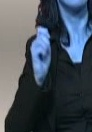

In [7]:
imshow(data[0][0])

In [8]:
data[1]['y']

array([43, 43,  8, ..., 24, 24, 24])

In [9]:
np.unique(data[1]['y'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44])

In [10]:
n_unique = len(np.unique(data[1]['y']))
n_unique

45

In [11]:
np.equal(43,data[1]['y'])

array([ True,  True, False, ..., False, False, False])

class: 0,size: 529


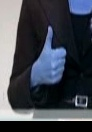

class: 1,size: 321


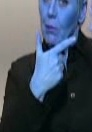

class: 2,size: 152


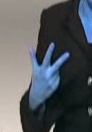

class: 3,size: 8


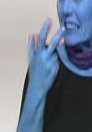

class: 4,size: 21


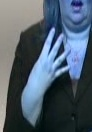

class: 5,size: 349


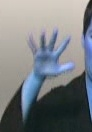

class: 6,size: 46


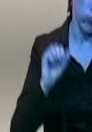

class: 7,size: 36


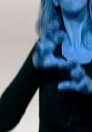

class: 8,size: 197


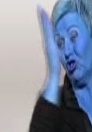

class: 9,size: 30


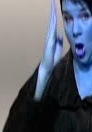

class: 10,size: 113


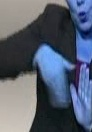

class: 11,size: 7


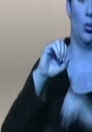

class: 12,size: 29


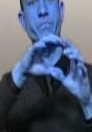

class: 13,size: 15


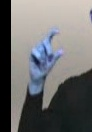

class: 14,size: 9


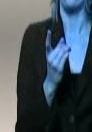

class: 15,size: 18


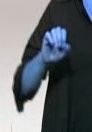

class: 16,size: 333


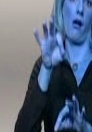

class: 17,size: 5


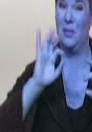

class: 18,size: 11


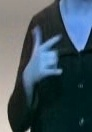

class: 19,size: 5


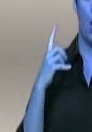

class: 20,size: 12


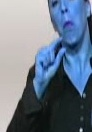

class: 21,size: 37


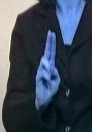

class: 22,size: 1


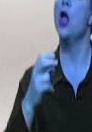

class: 23,size: 6


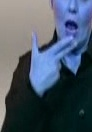

class: 24,size: 7


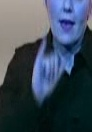

class: 25,size: 401


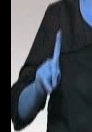

class: 26,size: 15


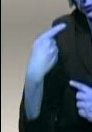

class: 27,size: 24


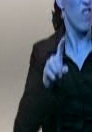

class: 28,size: 309


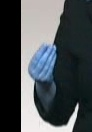

class: 29,size: 7


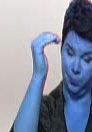

class: 30,size: 2


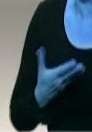

class: 31,size: 14


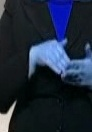

class: 32,size: 5


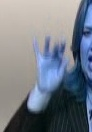

class: 33,size: 7


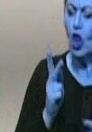

class: 34,size: 23


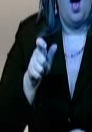

class: 35,size: 13


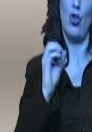

class: 36,size: 6


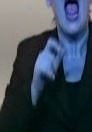

class: 37,size: 88


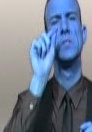

class: 38,size: 2


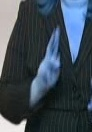

class: 39,size: 103


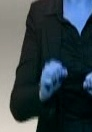

class: 40,size: 24


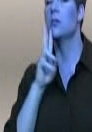

class: 41,size: 5


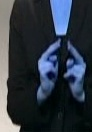

class: 42,size: 4


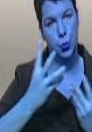

class: 43,size: 9


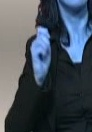

class: 44,size: 1


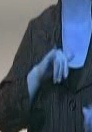

In [12]:
good_min = 20
good_classes = []
for i in range(n_unique):
    images = data[0][np.equal(i,data[1]['y'])]
    print("class: " + str(i) + ",size: " + str(len(images)))
    imshow(images[0])
    if len(images) >= good_min:
        good_classes = good_classes + [i]

In [13]:
good_classes

[0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 12, 16, 21, 25, 27, 28, 34, 37, 39, 40]

In [14]:
len(good_classes)

20

In [15]:
good_x = data[0][np.in1d(data[1]['y'], good_classes)]

In [16]:
good_y = data[1]['y'][np.in1d(data[1]['y'], good_classes)]

In [17]:
good_x

array([[[[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [158, 129, 107],
         [151, 122, 100],
         [149, 130, 116]],

        [[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [162, 133, 111],
         [151, 122, 100],
         [144, 125, 111]],

        [[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [170, 137, 112],
         [158, 125, 100],
         [148, 126, 108]],

        ...,

        [[192, 195, 204],
         [192, 195, 204],
         [192, 195, 204],
         ...,
         [ 44,  37,  35],
         [ 49,  42,  40],
         [ 54,  39,  30]],

        [[193, 196, 203],
         [193, 196, 203],
         [193, 196, 203],
         ...,
         [ 44,  39,  36],
         [ 48,  43,  40],
         [ 52,  46,  39]],

        [[195, 198, 205],
         [195, 198, 205],
         [195, 198, 205],
         ...,
         [ 44,  39,  36],
        

In [18]:
good_y

array([8, 8, 8, ..., 5, 5, 5])

In [19]:
my_dict = dict(zip(np.unique(good_y), range(len(np.unique(good_y)))))
my_dict

{0: 0,
 1: 1,
 2: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 12: 10,
 16: 11,
 21: 12,
 25: 13,
 27: 14,
 28: 15,
 34: 16,
 37: 17,
 39: 18,
 40: 19}

In [20]:
np.vectorize(my_dict.get)(good_y)

array([7, 7, 7, ..., 4, 4, 4])

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
rotation_range=10
width_shift_range=0.10
height_shift_range=0.10
horizontal_flip=True
batch_size = 16


features = good_x
labels = good_y
n_classes = len(np.unique(labels))
image_shape = np.shape(features)[1:]

x_train, x_test, y_train, y_test = train_test_split(features,
                                                    labels,
                                                    test_size=0.33,
                                                    random_state=42)
x_train, x_test = x_train / 255.0, x_test / 255.0

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=rotation_range,
    width_shift_range=width_shift_range,
    height_shift_range=height_shift_range,
    horizontal_flip=horizontal_flip)
datagen.fit(x_train)

train_gen =  datagen.flow(x_train, y_train, batch_size=batch_size)

batches = 0
for images, labels in train_gen:
    print(images)
    print(labels)
    batches += 1
    if batches >= len(x_train) / batch_size:
        # we need to break the loop by hand because
        # the generator loops indefinitely
        break

[[[[ 0.4965824   0.87748903  0.9842567 ]
   [ 0.46094596  0.83776563  0.9472328 ]
   [ 0.46094596  0.83776563  0.9472328 ]
   ...
   [ 2.1025736   1.2455894   0.5037655 ]
   [ 2.0747738   1.1649362   0.41361034]
   [ 2.0015304   1.1640518   0.4107194 ]]

  [[ 0.5027728   0.8843894   0.99068815]
   [ 0.46094596  0.83776563  0.9472328 ]
   [ 0.46094596  0.83776563  0.9472328 ]
   ...
   [ 2.1025736   1.2691956   0.5153052 ]
   [ 2.1025736   1.2127863   0.45820874]
   [ 2.0653238   1.2063075   0.4385365 ]]

  [[ 0.4920934   0.8724852   0.979593  ]
   [ 0.46094596  0.83776563  0.9472328 ]
   [ 0.46094596  0.83776563  0.9472328 ]
   ...
   [ 2.1025736   1.3022374   0.5502701 ]
   [ 2.1018293   1.24066     0.48981813]
   [ 2.0795565   1.2214153   0.4475258 ]]

  ...

  [[ 1.418562    1.9662029   2.0700498 ]
   [ 1.4351337   1.9846748   2.087267  ]
   [ 1.4459225   1.9967011   2.0984755 ]
   ...
   [-1.0438795  -0.8853886  -0.95729256]
   [-1.0438795  -0.8853886  -0.95729256]
   [-1.0438795  

[[[[ 8.71352851e-01  1.34098756e+00  1.40204477e+00]
   [ 8.71352851e-01  1.34098756e+00  1.40204477e+00]
   [ 8.71352851e-01  1.34098756e+00  1.40204477e+00]
   ...
   [ 1.18678868e+00  7.64163494e-01  2.15638608e-01]
   [ 1.21335864e+00  8.53014767e-01  3.07653338e-01]
   [ 1.21335864e+00  8.53014767e-01  3.07653338e-01]]

  [[ 8.71352851e-01  1.34098756e+00  1.40204477e+00]
   [ 8.71352851e-01  1.34098756e+00  1.40204477e+00]
   [ 8.71352851e-01  1.34098756e+00  1.40204477e+00]
   ...
   [ 1.18146014e+00  7.46344209e-01  1.97184861e-01]
   [ 1.21335864e+00  8.53014767e-01  3.07653338e-01]
   [ 1.20830309e+00  8.47379386e-01  3.02400798e-01]]

  [[ 8.71352851e-01  1.34098756e+00  1.40204477e+00]
   [ 8.71352851e-01  1.34098756e+00  1.40204477e+00]
   [ 8.71352851e-01  1.34098756e+00  1.40204477e+00]
   ...
   [ 1.15165007e+00  7.01235950e-01  1.53296649e-01]
   [ 1.17293835e+00  8.07958961e-01  2.65659213e-01]
   [ 1.16290152e+00  8.03768456e-01  2.73167342e-01]]

  ...

  [[ 9.01783

[[[[ 9.07266676e-01  8.06599796e-01  5.88152409e-01]
   [ 7.41513252e-01  6.16789579e-01  4.14377332e-01]
   [ 7.08504856e-01  5.65478921e-01  3.12433720e-01]
   ...
   [ 1.19458699e+00  1.73179030e+00  1.78050280e+00]
   [ 1.19313669e+00  1.73017359e+00  1.77899599e+00]
   [ 1.19168627e+00  1.72855675e+00  1.77748907e+00]]

  [[ 9.31922197e-01  8.48633051e-01  6.18288338e-01]
   [ 7.58917272e-01  6.36189461e-01  4.32458878e-01]
   [ 7.11405456e-01  5.70328951e-01  3.22981328e-01]
   ...
   [ 1.18599820e+00  1.72221637e+00  1.77157950e+00]
   [ 1.18599820e+00  1.72221637e+00  1.77157950e+00]
   [ 1.18599820e+00  1.72221637e+00  1.77157950e+00]]

  [[ 9.56577718e-01  8.90666127e-01  6.48424208e-01]
   [ 7.76321054e-01  6.55589342e-01  4.50540304e-01]
   [ 7.14306056e-01  5.75178862e-01  3.33528906e-01]
   ...
   [ 1.18106091e+00  1.71671283e+00  1.76644993e+00]
   [ 1.17961061e+00  1.71509624e+00  1.76494324e+00]
   [ 1.17816031e+00  1.71347964e+00  1.76343644e+00]]

  ...

  [[-9.48117

[[[[ 0.32172596  0.19460635 -0.37707636]
   [ 0.32162824  0.19449742 -0.37717792]
   [ 0.32153052  0.19438848 -0.37727946]
   ...
   [ 1.0269631   1.514444    1.6205652 ]
   [ 1.0267676   1.5142262   1.6203622 ]
   [ 1.0265722   1.5140083   1.620159  ]]

  [[ 0.31046334  0.18205205 -0.38375494]
   [ 0.31046334  0.18205205 -0.38355184]
   [ 0.31046334  0.18205205 -0.38334876]
   ...
   [ 1.0107193   1.4963373   1.603689  ]
   [ 1.0106215   1.4962283   1.6035874 ]
   [ 1.0105239   1.4961195   1.603486  ]]

  [[ 0.31046334  0.18205205 -0.3603518 ]
   [ 0.31046334  0.18205205 -0.3603518 ]
   [ 0.31046334  0.18205205 -0.3603518 ]
   ...
   [ 1.0081551   1.4934791   1.601025  ]
   [ 1.0081551   1.4934791   1.601025  ]
   [ 1.0081551   1.4934791   1.601025  ]]

  ...

  [[-1.1693741  -1.0405246  -1.0592475 ]
   [-1.1694717  -1.0406336  -1.0593492 ]
   [-1.1695695  -1.0407426  -1.0594507 ]
   ...
   [ 0.890794    1.3931565   1.4500904 ]
   [ 0.87070537  1.3707641   1.4440106 ]
   [ 0.8552592  

[[[[ 0.55670756  0.99025714  1.1320001 ]
   [ 0.55670756  0.99025714  1.1320001 ]
   [ 0.55670756  0.99025714  1.1320001 ]
   ...
   [-0.71937406 -0.9963908  -1.0617706 ]
   [-0.8207757  -0.968612   -0.9391885 ]
   [-0.76606774 -0.8044532  -0.76815426]]

  [[ 0.55670756  0.99025714  1.1320001 ]
   [ 0.55670756  0.99025714  1.1320001 ]
   [ 0.55670756  0.99025714  1.1320001 ]
   ...
   [-0.72623116 -1.0040343  -1.0651777 ]
   [-0.8195832  -0.96196556 -0.9320644 ]
   [-0.76487523 -0.8031239  -0.76691526]]

  [[ 0.55670756  0.99025714  1.1320001 ]
   [ 0.55670756  0.99025714  1.1320001 ]
   [ 0.55670756  0.99025714  1.1320001 ]
   ...
   [-0.73308814 -1.0116777  -1.0685848 ]
   [-0.8183906  -0.95531905 -0.92494035]
   [-0.76368266 -0.8017946  -0.7656763 ]]

  ...

  [[ 1.3118337   1.8472342   1.9875916 ]
   [ 1.3112376   1.8465697   1.9869725 ]
   [ 1.3106412   1.845905    1.9863529 ]
   ...
   [-0.99761206 -0.93536824 -0.960635  ]
   [-1.0093366  -0.9481051  -0.9706478 ]
   [-1.0071702  

[[[[ 1.0218354   1.5087283   1.5868121 ]
   [ 1.0218354   1.5087283   1.5868121 ]
   [ 1.0218354   1.5087283   1.5868121 ]
   ...
   [ 0.8062099   0.46016854  0.18312244]
   [ 0.8111578   0.46568397  0.18826306]
   [ 0.81610566  0.47119927  0.19340357]]

  [[ 1.0218354   1.5087283   1.5868121 ]
   [ 1.0218354   1.5087283   1.5868121 ]
   [ 1.0218354   1.5087283   1.5868121 ]
   ...
   [ 0.83563536  0.47899535  0.19198732]
   [ 0.8331614   0.47210112  0.18299133]
   [ 0.83068746  0.46520698  0.17399544]]

  [[ 1.0183622   1.5048567   1.5832037 ]
   [ 1.0171251   1.5034778   1.5819185 ]
   [ 1.015888    1.5020988   1.5806332 ]
   ...
   [ 0.79189676  0.39846665  0.09718784]
   [ 0.78447497  0.39019358  0.08947697]
   [ 0.7770532   0.3819205   0.0817661 ]]

  ...

  [[ 0.91239357  1.3409876   1.4446833 ]
   [ 0.91239357  1.3409876   1.4446833 ]
   [ 0.91239357  1.3409876   1.4446833 ]
   ...
   [-0.8758067  -0.80478436 -0.83952737]
   [-0.9030551  -0.8351578  -0.86783665]
   [-0.9207575  

[[[[-0.6061121  -0.5346581  -0.37456468]
   [-0.6061121  -0.5346581  -0.37456468]
   [-0.6061121  -0.5346581  -0.37456468]
   ...
   [ 1.350161    1.9204553   2.0274112 ]
   [ 1.350161    1.9204553   2.0274112 ]
   [ 1.350161    1.9204553   2.0274112 ]]

  [[-0.6061121  -0.5346581  -0.37456468]
   [-0.6061121  -0.5346581  -0.37456468]
   [-0.6061121  -0.5346581  -0.37456468]
   ...
   [ 1.350161    1.9204553   2.0274112 ]
   [ 1.350161    1.9204553   2.0274112 ]
   [ 1.350161    1.9204553   2.0274112 ]]

  [[-0.6061121  -0.5346581  -0.37456468]
   [-0.6061121  -0.5346581  -0.37456468]
   [-0.6061121  -0.5346581  -0.37456468]
   ...
   [ 1.350161    1.9204553   2.0274112 ]
   [ 1.350161    1.9204553   2.0274112 ]
   [ 1.350161    1.9204553   2.0274112 ]]

  ...

  [[-0.9471416  -0.8843003  -0.94206536]
   [-0.94626963 -0.8833284  -0.94115955]
   [-0.9453978  -0.8823565  -0.9402537 ]
   ...
   [-1.0063337  -0.858786   -0.83300763]
   [-0.9950206  -0.84617543 -0.8212541 ]
   [-1.0088263  

[[[[ 1.516598    1.8721727   1.7747535 ]
   [ 1.4391041   1.7603635   1.6507926 ]
   [ 1.4048818   1.6671664   1.5639288 ]
   ...
   [ 1.3638412   1.9204553   1.9847724 ]
   [ 1.3638412   1.9204553   1.9847724 ]
   [ 1.3638412   1.9204553   1.9847724 ]]

  [[ 1.5169584   1.871771    1.7737554 ]
   [ 1.4380233   1.7591586   1.6496698 ]
   [ 1.4048818   1.666497    1.563305  ]
   ...
   [ 1.3638412   1.9204553   1.9847724 ]
   [ 1.3638412   1.9204553   1.9847724 ]
   [ 1.3638412   1.9204553   1.9847724 ]]

  [[ 1.4794872   1.8291991   1.7334527 ]
   [ 1.3866498   1.7018934   1.596296  ]
   [ 1.346075    1.6002767   1.5015848 ]
   ...
   [ 1.3638412   1.9204553   1.9847724 ]
   [ 1.3638412   1.9204553   1.9847724 ]
   [ 1.3638412   1.9204553   1.9847724 ]]

  ...

  [[ 1.5242429   0.66567177  0.19475555]
   [ 1.476188    0.6508041   0.09966315]
   [ 1.4886942   0.671071    0.10436136]
   ...
   [ 0.5977483   0.99025714  1.1177872 ]
   [ 0.5977483   0.99025714  1.1177872 ]
   [ 0.5977483  

[[[[ 0.9391483   1.0353295   1.0603064 ]
   [ 0.9423032   1.0388461   1.0635842 ]
   [ 0.9454581   1.0423628   1.066862  ]
   ...
   [ 0.73455054  1.2189944   1.3025546 ]
   [ 0.73455054  1.2189944   1.3025546 ]
   [ 0.73455054  1.2189944   1.3025546 ]]

  [[ 0.7943468   0.8185821   0.8260519 ]
   [ 0.7999555   0.83108586  0.8413479 ]
   [ 0.8055641   0.84358966  0.8566437 ]
   ...
   [ 0.7086595   1.190134    1.2756555 ]
   [ 0.7093605   1.1909153   1.2763838 ]
   [ 0.7100616   1.1916969   1.2771121 ]]

  [[ 0.5538465   0.36185262  0.29046795]
   [ 0.5619089   0.3708397   0.29884428]
   [ 0.5699713   0.37982675  0.30722064]
   ...
   [ 0.7071901   1.1884961   1.2741289 ]
   [ 0.7071901   1.1884961   1.2741289 ]
   [ 0.7071901   1.1884961   1.2741289 ]]

  ...

  [[-1.0575597  -0.9463852  -0.95729256]
   [-1.0575597  -0.9463852  -0.95729256]
   [-1.0575597  -0.9463852  -0.95729256]
   ...
   [-1.1670016  -1.0226309  -0.9430797 ]
   [-1.1549234  -0.9957042  -0.9556281 ]
   [-1.1533214  

[[[[ 0.6877496   0.38269857 -0.12795897]
   [ 0.6901163   0.38797432 -0.12222223]
   [ 0.6924827   0.3932501  -0.11648549]
   ...
   [ 1.176762    1.7119209   1.7619836 ]
   [ 1.1775508   1.7128003   1.7628033 ]
   [ 1.1783397   1.7136796   1.7636229 ]]

  [[ 0.65779483  0.34047988 -0.17005147]
   [ 0.6593724   0.34223846 -0.16841239]
   [ 0.66094995  0.34399706 -0.1667733 ]
   ...
   [ 1.1723179   1.7069672   1.7573665 ]
   [ 1.1723179   1.7069672   1.7573665 ]
   [ 1.1723179   1.7069672   1.7573665 ]]

  [[ 0.66346383  0.3222879  -0.20985273]
   [ 0.66267514  0.32316723 -0.20739405]
   [ 0.6618863   0.32404646 -0.20493548]
   ...
   [ 1.1631273   1.6967225   1.7478181 ]
   [ 1.1639161   1.6976019   1.7486377 ]
   [ 1.164705    1.6984812   1.7494572 ]]

  ...

  [[-1.0028389  -0.931136   -0.9288668 ]
   [-1.0028389  -0.931136   -0.9288668 ]
   [-1.0028389  -0.931136   -0.9288668 ]
   ...
   [ 0.5784286   1.0214915   1.084625  ]
   [ 0.80064183  1.266901    1.3197564 ]
   [ 0.7640354  

[[[[-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   ...
   [ 1.2460898   0.63026416  0.18531737]
   [ 1.2399414   0.6039817   0.1653481 ]
   [ 1.2203227   0.5405452   0.11590827]]

  [[-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   ...
   [ 1.224228    0.64439416  0.16858478]
   [ 1.2586926   0.6461809   0.18362017]
   [ 1.2587887   0.59270793  0.15154502]]

  [[-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   ...
   [ 1.2365383   0.71111214  0.18960674]
   [ 1.2884312   0.7159071   0.21261741]
   [ 1.2932118   0.65229213  0.17742254]]

  ...

  [[-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   ...
   [-1.1396412  -1.0073818  -0.9999312 ]
   [-1.1283972  -0.9948485  -0.9882496 ]
   [-1.1484022  

[[[[ 1.1859982   1.7222164   1.8000052 ]
   [ 1.1859982   1.7222164   1.8000052 ]
   [ 1.1859982   1.7222164   1.8000052 ]
   ...
   [ 1.3643394   1.7642903   1.8017172 ]
   [ 1.26489     1.7339101   1.8109043 ]
   [ 1.2407191   1.7155604   1.790598  ]]

  [[ 1.1859982   1.7222164   1.8000052 ]
   [ 1.1859982   1.7222164   1.8000052 ]
   [ 1.1859982   1.7222164   1.8000052 ]
   ...
   [ 1.3547189   1.7616094   1.8029665 ]
   [ 1.2624848   1.7312291   1.8084055 ]
   [ 1.2407191   1.7222629   1.794346  ]]

  [[ 1.1859982   1.7222164   1.8000052 ]
   [ 1.1859982   1.7222164   1.8000052 ]
   [ 1.1859982   1.7222164   1.8000052 ]
   ...
   [ 1.3450983   1.7589285   1.8042159 ]
   [ 1.2600797   1.7285482   1.8059068 ]
   [ 1.2407191   1.7289654   1.7980943 ]]

  ...

  [[ 0.65951943  1.10486     1.2103893 ]
   [ 0.65831673  1.1035193   1.2091397 ]
   [ 0.66431546  1.1102061   1.2153721 ]
   ...
   [-0.9207575  -0.931136   -0.9288668 ]
   [-0.9207575  -0.931136   -0.9288668 ]
   [-0.9207575  

[[[[ 0.55383587  0.2703459  -0.27805808]
   [ 0.59919375  0.2025087  -0.2861097 ]
   [ 0.6531668   0.22857721 -0.245924  ]
   ...
   [ 0.65246916  1.0970012   1.2030644 ]
   [ 0.65246916  1.0970012   1.2030644 ]
   [ 0.65246916  1.0970012   1.2030644 ]]

  [[ 0.55158174  0.26783335 -0.28039995]
   [ 0.59017736  0.21758449 -0.28376782]
   [ 0.6441504   0.21852665 -0.25529152]
   ...
   [ 0.65246916  1.0911263   1.1994141 ]
   [ 0.65246916  1.0835886   1.1947303 ]
   [ 0.65246916  1.0760506   1.1900467 ]]

  [[ 0.5493278   0.2653207  -0.2827418 ]
   [ 0.58116096  0.23266016 -0.28142595]
   [ 0.635134    0.2084762  -0.26465902]
   ...
   [ 0.65246916  1.0512537   1.1746387 ]
   [ 0.65246916  1.0512537   1.1746387 ]
   [ 0.65246916  1.0512537   1.1746387 ]]

  ...

  [[ 1.2856748   0.8421297   0.25486922]
   [ 1.2676418   0.8220286   0.23613422]
   [ 1.249609    0.8019277   0.21739921]
   ...
   [-0.7572944  -0.572181   -0.45412496]
   [ 0.24870393  0.6011826   0.726727  ]
   [ 1.1242888  

[[[[ 1.3323144   0.5433877   0.16119622]
   [ 1.6671507   0.9261487   0.4735636 ]
   [ 1.9525055   1.2499546   0.74868304]
   ...
   [ 1.0462632   1.5424955   1.6436636 ]
   [ 1.0355157   1.5544757   1.6436636 ]
   [ 1.0355157   1.5544757   1.6436636 ]]

  [[ 1.2072597   0.51922345  0.15209933]
   [ 1.7168612   1.0491992   0.62821776]
   [ 1.990915    1.3386207   0.88474303]
   ...
   [ 1.0449439   1.543966    1.6436636 ]
   [ 1.0355157   1.5544757   1.6436636 ]
   [ 1.0355157   1.5544757   1.6436636 ]]

  [[ 0.96822834  0.2595393  -0.08915002]
   [ 1.6206248   0.9493614   0.5421764 ]
   [ 1.8671434   1.2157993   0.78791326]
   ...
   [ 1.0436246   1.5454367   1.6436636 ]
   [ 1.0355157   1.5544757   1.6436636 ]
   [ 1.0355157   1.5544757   1.6436636 ]]

  ...

  [[-1.0165191  -0.9463852  -0.8862282 ]
   [-1.0165191  -0.9463852  -0.8862282 ]
   [-1.0165191  -0.9463852  -0.8862282 ]
   ...
   [ 0.772375    1.2306584   1.3560647 ]
   [ 0.7710557   1.2291878   1.354694  ]
   [ 0.7697364  

[[[[ 0.5293471   0.99610645  1.1005567 ]
   [ 0.5213015   1.0117872   1.1094284 ]
   [ 0.5394847   1.0143561   1.1118228 ]
   ...
   [-0.7702749  -0.67190045 -0.81516385]
   [-0.7702749  -0.67190045 -0.81516385]
   [-0.7702749  -0.67190045 -0.81516385]]

  [[ 0.5293471   0.98851466  1.0952499 ]
   [ 0.52300423  1.0136851   1.1111975 ]
   [ 0.5343767   1.0124581   1.1100538 ]
   ...
   [-0.7800191  -0.6610387  -0.81516385]
   [-0.7817217  -0.6591408  -0.81516385]
   [-0.7834244  -0.6572429  -0.81516385]]

  [[ 0.5293471   0.9809231   1.089943  ]
   [ 0.5247068   1.0155829   1.1129663 ]
   [ 0.52926874  1.0105602   1.1082848 ]
   ...
   [-0.7646795  -0.63516504 -0.79513764]
   [-0.76127416 -0.6313692  -0.7915998 ]
   [-0.7578689  -0.6275734  -0.78806186]]

  ...

  [[ 1.3452371   1.8844686   1.9938701 ]
   [ 1.3486559   1.8882794   1.997422  ]
   [ 1.3493637   1.8890684   1.9981573 ]
   ...
   [-1.1360779  -1.0796556  -1.1278471 ]
   [-1.1468161  -1.0916253  -1.1278471 ]
   [-1.152312   

[[[[ 1.1586376   0.76151985  0.2650147 ]
   [ 1.1586376   0.76151985  0.2650147 ]
   [ 1.1586376   0.76151985  0.2650147 ]
   ...
   [ 0.6251087   1.0665029   1.146213  ]
   [ 0.6251087   1.0665029   1.146213  ]
   [ 0.6251087   1.0665029   1.146213  ]]

  [[ 1.1586376   0.76151985  0.2650147 ]
   [ 1.1586376   0.76151985  0.2650147 ]
   [ 1.1586376   0.76151985  0.2650147 ]
   ...
   [ 0.6251087   1.0665029   1.146213  ]
   [ 0.6251087   1.0665029   1.146213  ]
   [ 0.6251087   1.0665029   1.146213  ]]

  [[ 1.1586376   0.76151985  0.2650147 ]
   [ 1.1586376   0.76151985  0.2650147 ]
   [ 1.1586376   0.76151985  0.2650147 ]
   ...
   [ 0.6251087   1.0665029   1.146213  ]
   [ 0.6251087   1.0665029   1.146213  ]
   [ 0.6251087   1.0665029   1.146213  ]]

  ...

  [[-1.0415407  -0.9285291  -0.94065   ]
   [-1.0618917  -0.9512139  -0.9617931 ]
   [-1.0697057  -0.9599241  -0.9699114 ]
   ...
   [ 1.0765563   1.5697248   1.6152378 ]
   [ 1.0765563   1.5697248   1.6152378 ]
   [ 1.0765563  

[[[[ 9.67114449e-01  1.44773161e+00  1.52996063e+00]
   [ 9.67114449e-01  1.44773161e+00  1.50929916e+00]
   [ 9.67114449e-01  1.44773161e+00  1.50153482e+00]
   ...
   [ 1.61556995e+00  1.04908550e+00  6.12219691e-01]
   [ 1.63468444e+00  1.06430447e+00  6.19312048e-01]
   [ 1.64562225e+00  1.07561719e+00  6.28831506e-01]]

  [[ 9.67114449e-01  1.44773161e+00  1.52996063e+00]
   [ 9.67114449e-01  1.44773161e+00  1.51213622e+00]
   [ 9.67114449e-01  1.44773161e+00  1.50153482e+00]
   ...
   [ 1.72179151e+00  1.16052175e+00  7.07966387e-01]
   [ 1.73134863e+00  1.17117512e+00  7.17895746e-01]
   [ 1.73540699e+00  1.17202103e+00  7.11828470e-01]]

  [[ 9.67114449e-01  1.44773161e+00  1.52996063e+00]
   [ 9.67114449e-01  1.44773161e+00  1.51497328e+00]
   [ 9.67114449e-01  1.44773161e+00  1.50153482e+00]
   ...
   [ 1.75716937e+00  1.15989184e+00  6.32693648e-01]
   [ 1.75990009e+00  1.15837002e+00  6.22764349e-01]
   [ 1.76159930e+00  1.15914762e+00  6.21408224e-01]]

  ...

  [[ 8.71352

[[[[ 0.5248276   0.0975769  -0.01798887]
   [ 0.7038697   0.30034414  0.162075  ]
   [ 0.8744809   0.43035862  0.28325415]
   ...
   [ 1.3641102   1.8891935   1.9728216 ]
   [ 1.3543178   1.8788943   1.9614993 ]
   [ 1.350161    1.8747078   1.9563468 ]]

  [[ 1.0017416   0.53234816  0.34175348]
   [ 1.1619097   0.7029822   0.47911036]
   [ 1.2918333   0.78844213  0.5480497 ]
   ...
   [ 1.355226    1.8803538   1.961609  ]
   [ 1.3502942   1.8748564   1.9564854 ]
   [ 1.3500202   1.8745509   1.9562007 ]]

  [[ 1.474377    0.8650592   0.56093794]
   [ 1.5558053   0.96025044  0.6207947 ]
   [ 1.6055217   0.9832687   0.6321828 ]
   ...
   [ 1.3505152   1.8751028   1.9567149 ]
   [ 1.3417255   1.865305    1.9475831 ]
   [ 1.3364806   1.8594587   1.942134  ]]

  ...

  [[ 0.31046334 -0.15342927 -0.37456468]
   [ 0.31046334 -0.15342927 -0.37456468]
   [ 0.31046334 -0.15342927 -0.37456468]
   ...
   [ 0.57007176  0.9746557   1.0321816 ]
   [ 0.5293471   0.9292605   0.9898714 ]
   [ 0.5293471  

[[[[ 1.1529274   1.5786088   1.6519438 ]
   [ 1.1538907   1.5796826   1.6529447 ]
   [ 1.154854    1.5807564   1.6539454 ]
   ...
   [ 0.03241478 -0.27607098 -0.40141946]
   [ 0.2277725  -0.0626137  -0.19043043]
   [ 0.52810264  0.26129138  0.05068433]]

  [[ 1.1449574   1.5697248   1.6436636 ]
   [ 1.1449574   1.5697248   1.6436636 ]
   [ 1.1449574   1.5697248   1.6436636 ]
   ...
   [ 0.09350954 -0.20952024 -0.3350553 ]
   [ 0.393242    0.1218327  -0.01851834]
   [ 0.6841712   0.43394312  0.2056732 ]]

  [[ 1.1449574   1.5697248   1.6436636 ]
   [ 1.1449574   1.5697248   1.6436636 ]
   [ 1.1449574   1.5697248   1.6436636 ]
   ...
   [ 0.23548052 -0.05402169 -0.18242231]
   [ 0.6254975   0.38072452  0.22278015]
   [ 0.8783384   0.6104982   0.37628147]]

  ...

  [[-0.85235626 -0.67190045 -0.58775777]
   [-0.8570729  -0.677158   -0.5926581 ]
   [-1.0863811  -0.9327645  -0.8308945 ]
   ...
   [-1.093561   -0.9407679  -0.83835405]
   [-1.0953089  -0.9427162  -0.8401699 ]
   [-1.1052467  

[[[[ 1.4732829   1.8242468   1.744652  ]
   [ 1.4697704   1.8860416   1.8389946 ]
   [ 1.4361897   1.8576504   1.8226446 ]
   ...
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]]

  [[ 1.4730599   1.8134625   1.7287091 ]
   [ 1.4732829   1.8890966   1.8413609 ]
   [ 1.4464993   1.8601016   1.8148172 ]
   ...
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]]

  [[ 1.4520433   1.7900357   1.7068741 ]
   [ 1.4732829   1.8784482   1.825481  ]
   [ 1.4503206   1.8643612   1.8187873 ]
   ...
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]]

  ...

  [[-1.0165191  -0.90063775 -0.91465396]
   [-1.0165191  -0.90063775 -0.91465396]
   [-1.0165191  -0.90063775 -0.91465396]
   ...
   [ 0.6250809   1.0664718   1.1461841 ]
   [ 0.6251087   1.0665029   1.146213  ]
   [ 0.62370646 

[[[[ 1.5690446   2.01195     2.0274112 ]
   [ 1.5690446   2.01195     2.0274112 ]
   [ 1.5690446   2.01195     2.0274112 ]
   ...
   [ 1.6237655   2.0729468   2.0842628 ]
   [ 1.6237655   2.0729468   2.0842628 ]
   [ 1.6237655   2.0729468   2.0842628 ]]

  [[ 1.5568968   1.9984093   2.0147903 ]
   [ 1.5565848   1.9980617   2.0144663 ]
   [ 1.556273    1.997714    2.0141423 ]
   ...
   [ 1.6112195   2.0589619   2.0712283 ]
   [ 1.6109077   2.0586143   2.0709043 ]
   [ 1.6105957   2.0582666   2.0705802 ]]

  [[ 1.5553644   1.9967011   2.0131981 ]
   [ 1.5553644   1.9967011   2.0131981 ]
   [ 1.5553644   1.9967011   2.0131981 ]
   ...
   [ 1.6100852   2.0576978   2.0700498 ]
   [ 1.6100852   2.0576978   2.0700498 ]
   [ 1.6100852   2.0576978   2.0700498 ]]

  ...

  [[ 1.3420348   1.8188705   1.859742  ]
   [ 1.3364806   1.8137113   1.8568568 ]
   [ 1.4639549   1.955805    1.9892943 ]
   ...
   [-0.81007344 -0.6247684  -0.50119   ]
   [-0.8113156  -0.626153   -0.50248057]
   [-0.8113156  

[[[[ 1.623331    2.0724623   2.0553856 ]
   [ 1.6219116   2.0708802   2.053911  ]
   [ 1.6204923   2.069298    2.0524364 ]
   ...
   [ 0.8437098   0.3189793  -0.19009095]
   [ 0.864999    0.34271023 -0.16797267]
   [ 0.88628834  0.3664412  -0.1458545 ]]

  [[ 1.6100852   2.0576978   2.041624  ]
   [ 1.6100852   2.0576978   2.041624  ]
   [ 1.6100852   2.0576978   2.041624  ]
   ...
   [ 1.0229181   0.5187402  -0.00390507]
   [ 1.0342724   0.53139675  0.00789136]
   [ 1.0456268   0.54405326  0.01968779]]

  [[ 1.6100852   2.0576978   2.041624  ]
   [ 1.6100852   2.0576978   2.041624  ]
   [ 1.6100852   2.0576978   2.041624  ]
   ...
   [ 1.1039168   0.6090282   0.08024734]
   [ 1.1039168   0.6090282   0.08024734]
   [ 1.1039168   0.6090282   0.08024734]]

  ...

  [[ 1.3775214   1.8442096   1.828431  ]
   [ 1.3775214   1.8442096   1.828431  ]
   [ 1.3775214   1.8442096   1.828431  ]
   ...
   [-0.92441046 -0.79796565 -0.8189591 ]
   [-0.892258   -0.7621257  -0.78555465]
   [-0.8660365  

[[[[-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   ...
   [-0.22306564 -0.7786445  -0.6019707 ]
   [-0.22306564 -0.7786445  -0.6019707 ]
   [-0.22306564 -0.7786445  -0.6019707 ]]

  [[-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   ...
   [-0.22306564 -0.7786445  -0.6019707 ]
   [-0.22306564 -0.7786445  -0.6019707 ]
   [-0.22306564 -0.7786445  -0.6019707 ]]

  [[-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   ...
   [-0.19078466 -0.74266136 -0.5684328 ]
   [-0.1093963  -0.651939   -0.48387557]
   [-0.02800795 -0.56121653 -0.39931834]]

  ...

  [[-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   ...
   [-1.0863017  -1.0241709  -0.95872784]
   [-1.0726333  -1.0089349  -0.94452727]
   [-1.0526335  

[[[[ 0.96711445  0.50228417  0.00918297]
   [ 0.96711445  0.50228417  0.00918297]
   [ 0.96711445  0.50228417  0.00918297]
   ...
   [ 0.46094596  0.8835131   0.97565854]
   [ 0.46094596  0.8835131   0.97565854]
   [ 0.46094596  0.8835131   0.97565854]]

  [[ 0.96711445  0.50228417  0.00918297]
   [ 0.96711445  0.50228417  0.00918297]
   [ 0.96711445  0.50228417  0.00918297]
   ...
   [ 0.46094596  0.8835131   0.97565854]
   [ 0.46094596  0.8835131   0.97565854]
   [ 0.46094596  0.8835131   0.97565854]]

  [[ 0.96711445  0.50228417  0.00918297]
   [ 0.96711445  0.50228417  0.00918297]
   [ 0.96711445  0.50228417  0.00918297]
   ...
   [ 0.46094596  0.8835131   0.97565854]
   [ 0.46094596  0.8835131   0.97565854]
   [ 0.46094596  0.8835131   0.97565854]]

  ...

  [[-1.0622152  -0.91909045 -0.95161796]
   [-1.0757282  -0.936139   -0.96195555]
   [-1.0849202  -0.9463852  -0.97150546]
   ...
   [ 1.2924209   1.825595    1.9389974 ]
   [ 1.2860248   1.8184654   1.9323521 ]
   [ 1.2817597  

[[[[ 0.9697936   0.06304514 -0.10173666]
   [ 0.954535    0.04603671 -0.11758927]
   [ 0.9534342   0.04480969 -0.1187329 ]
   ...
   [ 0.7071901   1.1579977   1.259916  ]
   [ 0.7071901   1.1579977   1.259916  ]
   [ 0.7071901   1.1579977   1.259916  ]]

  [[ 1.0189242   0.11540002 -0.05293962]
   [ 1.0490732   0.151417   -0.01937023]
   [ 1.0338148   0.13440856 -0.03522284]
   ...
   [ 0.7071901   1.1579977   1.259916  ]
   [ 0.7071901   1.1579977   1.259916  ]
   [ 0.7071901   1.1579977   1.259916  ]]

  [[ 0.8139478  -0.12592295 -0.27786317]
   [ 0.8603649  -0.07396822 -0.22943915]
   [ 0.8908819  -0.03752154 -0.1954692 ]
   ...
   [ 0.7071901   1.1579977   1.259916  ]
   [ 0.7071901   1.1579977   1.259916  ]
   [ 0.7071901   1.1579977   1.259916  ]]

  ...

  [[-0.90465313 -0.836939   -0.8694969 ]
   [-0.873442   -0.80214846 -0.8370705 ]
   [-0.8564254  -0.7831803  -0.81939137]
   ...
   [-0.76508623 -0.589871   -0.40730974]
   [-0.31343046 -0.06002454  0.10950878]
   [-0.04584965 

[[[[ 1.4222164   1.9855255   2.045421  ]
   [ 1.418562    1.9814517   2.041624  ]
   [ 1.398555    1.9591504   2.020838  ]
   ...
   [-0.4262869  -0.55348766 -0.47080034]
   [-0.41525152 -0.5479523  -0.46850735]
   [-0.40421626 -0.54241693 -0.46621436]]

  [[ 1.4061714   1.9676403   2.0287511 ]
   [ 1.3978468   1.958361    2.0201023 ]
   [ 1.385377    1.944461    2.0071468 ]
   ...
   [-0.13194467 -0.34159192 -0.32253447]
   [-0.1181505  -0.32621583 -0.30820328]
   [-0.10435643 -0.3108397  -0.29387206]]

  [[ 1.4007174   1.9615608   2.0230849 ]
   [ 1.3912016   1.9509535   2.0131981 ]
   [ 1.3823017   1.9410329   2.003952  ]
   ...
   [ 0.3101248   0.05330782  0.01512342]
   [ 0.33716133  0.07052915  0.02716168]
   [ 0.36419773  0.08775035  0.03919984]]

  ...

  [[ 0.50841767  0.90593076  0.9681271 ]
   [ 0.5019866   0.8987622   0.9614456 ]
   [ 0.5019866   0.8987622   0.9614456 ]
   ...
   [ 1.7909743   1.1003964   0.6661397 ]
   [ 1.4461454   0.79958814  0.44418952]
   [ 1.1859982  

[[[[-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   ...
   [ 1.0389371   0.70052326  0.76128054]
   [ 1.0409043   0.70052326  0.7605992 ]
   [ 1.0428715   0.70052326  0.75991803]]

  [[-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   ...
   [ 0.9979436   0.6586423   0.7234305 ]
   [ 0.9999108   0.6608351   0.7254743 ]
   [ 1.0018778   0.6630277   0.7275179 ]]

  [[-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   ...
   [ 0.91942525  0.64083296  0.6808408 ]
   [ 0.92335945  0.64156383  0.6828845 ]
   [ 0.9272939   0.64229476  0.6849283 ]]

  ...

  [[-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   [-1.3858852  -1.2971157  -1.1278471 ]
   ...
   [-0.98915863 -0.8701394  -1.1136342 ]
   [-0.98915863 -0.8701394  -1.1136342 ]
   [-0.98915863 

[[[[ 8.16631913e-01  1.27999103e+00  1.34519327e+00]
   [ 8.16631913e-01  1.27999103e+00  1.34519327e+00]
   [ 8.16631913e-01  1.27999103e+00  1.34519327e+00]
   ...
   [ 8.43666136e-01  1.98424369e-01 -6.06185244e-03]
   [ 5.72919309e-01 -7.43617713e-02 -3.00870329e-01]
   [ 6.36484683e-01 -8.36590654e-04 -2.36074001e-01]]

  [[ 8.16631913e-01  1.27999103e+00  1.34519327e+00]
   [ 8.16631913e-01  1.27999103e+00  1.34519327e+00]
   [ 8.16631913e-01  1.27999103e+00  1.34519327e+00]
   ...
   [ 8.23388338e-01  1.77973732e-01 -2.81323865e-02]
   [ 5.76781571e-01 -7.00563267e-02 -2.96857506e-01]
   [ 6.54831231e-01  2.39193775e-02 -2.19019502e-01]]

  [[ 8.16631913e-01  1.27999103e+00  1.34519327e+00]
   [ 8.16631913e-01  1.27999103e+00  1.34519327e+00]
   [ 8.16631913e-01  1.27999103e+00  1.34519327e+00]
   ...
   [ 8.03110540e-01  1.57523096e-01 -5.02029210e-02]
   [ 5.80644071e-01 -6.57509938e-02 -2.92844653e-01]
   [ 6.73177779e-01  4.86754589e-02 -2.01964930e-01]]

  ...

  [[ 9.98007

In [23]:
features

array([[[[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [158, 129, 107],
         [151, 122, 100],
         [149, 130, 116]],

        [[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [162, 133, 111],
         [151, 122, 100],
         [144, 125, 111]],

        [[221, 222, 225],
         [221, 222, 225],
         [221, 222, 225],
         ...,
         [170, 137, 112],
         [158, 125, 100],
         [148, 126, 108]],

        ...,

        [[192, 195, 204],
         [192, 195, 204],
         [192, 195, 204],
         ...,
         [ 44,  37,  35],
         [ 49,  42,  40],
         [ 54,  39,  30]],

        [[193, 196, 203],
         [193, 196, 203],
         [193, 196, 203],
         ...,
         [ 44,  39,  36],
         [ 48,  43,  40],
         [ 52,  46,  39]],

        [[195, 198, 205],
         [195, 198, 205],
         [195, 198, 205],
         ...,
         [ 44,  39,  36],
        

In [24]:
good_min = 20
good_classes = []
n_unique = len(np.unique(data[1]['y']))
for i in range(n_unique):
    images = data[0][np.equal(i,data[1]['y'])]
    if len(images) >= good_min:
        good_classes = good_classes + [i]
        
good_x = data[0][np.in1d(data[1]['y'], good_classes)]
good_y = data[1]['y'][np.in1d(data[1]['y'], good_classes)]
my_dict = dict(zip(np.unique(good_y), range(len(np.unique(good_y)))))
good_y = np.vectorize(my_dict.get)(good_y)